Education is the key to success, but how much of the knowledge that is taught at schools is reflected on students' scores? The answer to whether students are performing well or not is every educator's goal and the only way to find the answers is to examine scores and see which factors have an impact on whether a student gets a high or a low mark or even fail. 

This dataset consists of eight columns that provide us with both potential factors that influence students' scores (gender, ethnicity, parental level of education, lunch and test prep) as well as their scores in math, writing and reading. 

In this project, I will: 

1- predict student's scores (target) based on five factors: gender, race/ethnicity, lunch, parental level of education and test preparation course (features)

2- find out what kind of students there are in my dataset. 

The method I will be using is multi-linear regression (supervised learning) for prediction and hierarchical clustering (unsupervised learning) to cluster students. 

So here we go! 

Link: https://www.kaggle.com/spscientist/students-performance-in-exams 

In [3]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Step 1 : Data Inspection 

This dataset is a collection of students' performance in the U.S. It includes the following: 

1- Two genders: Male + Female.

2- Five ethnicity groups (A, B, C, D, E) Names were not mentioned in order to prevent prejudices. 

3- Five types of parental level of education which are: 
- Master's Degree
- Bachelor's Degree
- Associate's Degree
- Some College
- High School
- Some High School
* 'some' means did not complete their degree. Hence 'some high school' and 'some college' means they did not complete their education 

3- Two types of lunches: a)standard /  b) free/reduced 
Since this is collected from the U.S, free/reduced lunch is part of the National School Lunch Program. The type of lunch students have implies social status free/reduced meals are only given to students who come from a family with a certain low income level. 
Source: https://www.feedingamerica.org/take-action/advocate/federal-hunger-relief-programs/national-school-lunch-program 

4- Test preparation course: none (did not take the prep course) and completed (did take the prep course) 

5- Scores in math, reading and writing and they are out of a 100. 

Step 2 : Data Cleaning 

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

#Since the max is 100, this informs us that the test scores are out of 100. 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#checking categorical and numerical data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


Step 3 : Data Transformation & Feature Engineering 

I want to predict the overall score which is why I will take the percentage of the students' scores in math, reading and writing. After that, I will decide what the grade is based on the U.S grading system (Keeping in mind this dataset was collected in the U.S). To achieve accuracy, I looked up the grading system and I have used the informationin Wikipedia as a resource. 

Source: https://en.wikipedia.org/wiki/Academic_grading_in_the_United_States

In [8]:
score = ((df['math score'] + df['reading score'] + df['writing score']) / 300) * 100
df['percentage'] = score
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
def Grade(percentage):
    if (percentage >= 96):return 'A'
    if (percentage >= 80):return 'B'
    if (percentage >= 70):return 'C'
    if (percentage >= 60):return 'D'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["percentage"]), axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,B
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,B
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,F
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,D
998,female,group D,some college,standard,completed,68,78,77,74.333333,C


In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,B
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,B
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,F
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,D
998,female,group D,some college,standard,completed,68,78,77,74.333333,C


In [11]:
encoder = {"gender": {"male": 0, "female": 1}, "race/ethnicity": {"group A": 0, "group B": 1, "group C":2, "group D":3, "group E":4}, "parental level of education": {"some high school":0, "high school":1, "some college":2, "associate's degree":3, "bachelor's degree":4, "master's degree":5}}

df.replace(encoder, inplace=True)

In [12]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,1,1,4,standard,none,72,72,74,72.666667,C
1,1,2,2,standard,completed,69,90,88,82.333333,B
2,1,1,5,standard,none,90,95,93,92.666667,B
3,0,0,3,free/reduced,none,47,57,44,49.333333,F
4,0,2,2,standard,none,76,78,75,76.333333,C
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,standard,completed,88,99,95,94.000000,B
996,0,2,1,free/reduced,none,62,55,55,57.333333,F
997,1,2,1,free/reduced,completed,59,71,65,65.000000,D
998,1,3,2,standard,completed,68,78,77,74.333333,C


In [13]:
encoder = {"lunch": {"free/reduced": 0, "standard": 1}, "test preparation course": {"none": 0, "completed": 1}, "grade": {"F":0, "D":1, "C":2, "B":3, "A":4}}

df.replace(encoder, inplace=True)

In [14]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade
0,1,1,4,1,0,72,72,74,72.666667,2
1,1,2,2,1,1,69,90,88,82.333333,3
2,1,1,5,1,0,90,95,93,92.666667,3
3,0,0,3,0,0,47,57,44,49.333333,0
4,0,2,2,1,0,76,78,75,76.333333,2
...,...,...,...,...,...,...,...,...,...,...
995,1,4,5,1,1,88,99,95,94.000000,3
996,0,2,1,0,0,62,55,55,57.333333,0
997,1,2,1,0,1,59,71,65,65.000000,1
998,1,3,2,1,1,68,78,77,74.333333,2


Step 4 : Data Visualization 

<AxesSubplot:>

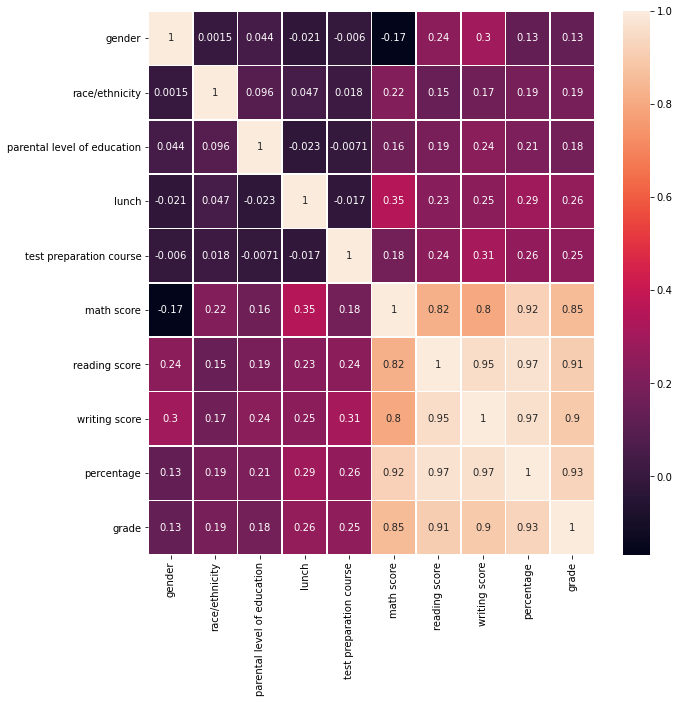

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

There is a correlation between grade and lunch, test preparation, parental level of education, race/ethnicty and gender. Regardless of how low it is, there is still a connection. The Pairgrid below shows a better visualization to describe the connect between students' grade and other features. 

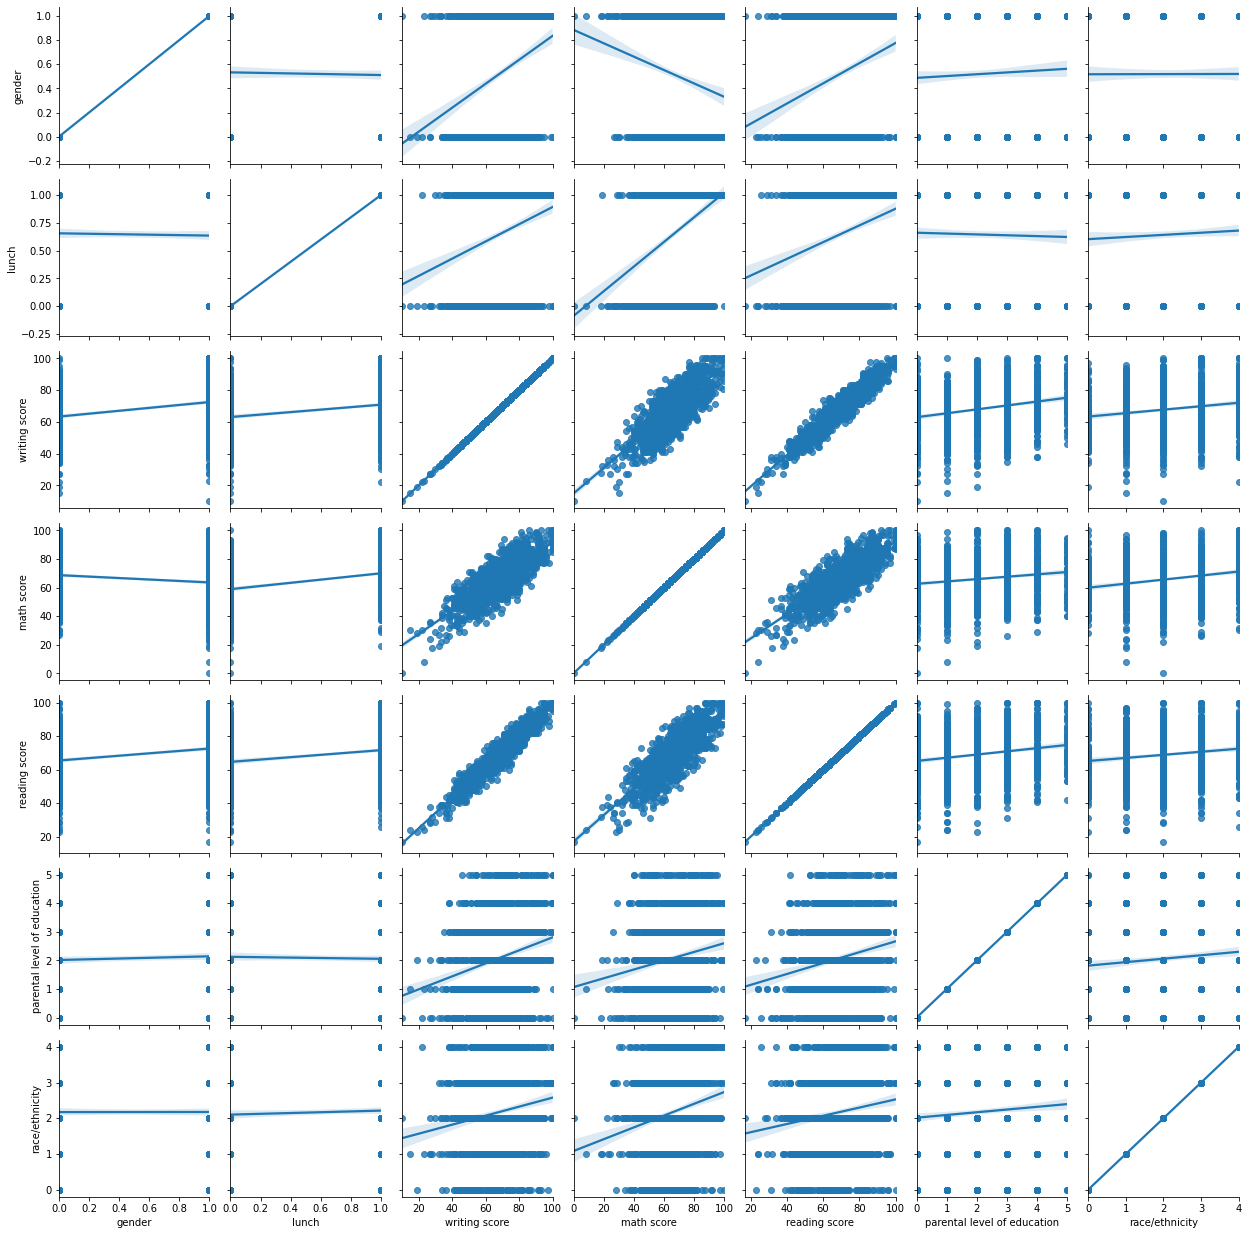

In [16]:
g = sns.PairGrid(df[['gender','lunch', 'writing score', 'math score', 'reading score', 'parental level of education', 'race/ethnicity']])
g.map(sns.regplot)

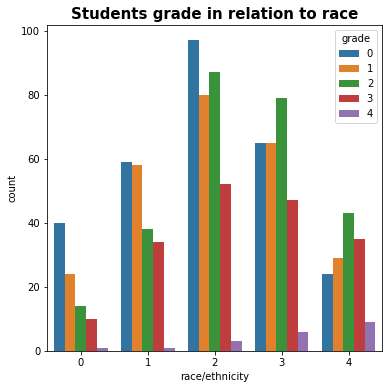

In [57]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='race/ethnicity', hue='grade')
plt.title('Students grade in relation to race', fontsize=15, fontweight='bold')
plt.show()

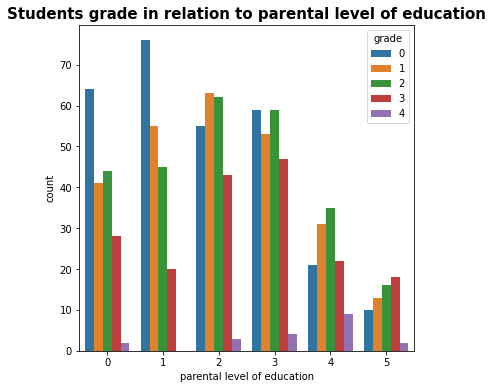

In [56]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='parental level of education', hue='grade')
plt.title('Students grade in relation to parental level of education', fontsize=15, fontweight='bold')
plt.show()

In [23]:
#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Step 5: Training & Testing

First model - Multiple Linear Regression 

My goal is to predict the grade based on certain factors and since I had clear features (gender,race/ethnicity, parental level of education, lunch, test preparation course) and a clear target (grade), supervised learning was a great option. The fact that I wanted to consider more than one feature to get the target, multiple linear regression made sense the most as it would describe the relationship between independent variables and one dependent variable. 


Step 6 : Feature Scaling/Standardization 

*Note: I tried to do scaling but it actually did not help me with the accuracy. My data is mostly categorical which was transformed to numerical which is why scaling did not make much of a difference. 

In [24]:
x=df[["lunch","parental level of education", "race/ethnicity", "gender", "test preparation course"]]  #we have more than one input
y=df["grade"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
print("train Accuracy",model.score(x,y))
print("test Accuracy",model.score(x,y))

MSE 1.0682190497210309
R squared 0.21578750604788155
train Accuracy 0.2094027155792979
test Accuracy 0.2094027155792979


I used multiple linear regression model to predict the grade. The accuracy is not that grade as there isn't enough data to make accurate. Thaat is why I'm opting for Clustering.

Second Model - Hierarchical Clustering 

To find out what kind of students there are, I have used hierarchical clustering. I can see 4 clusters which means there are 4 types of students. In order to understand what kind of students there are, further research can be done by using partitional clustering and KNN.

In [25]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,4
4,0
...,...
995,0
996,4
997,2
998,0


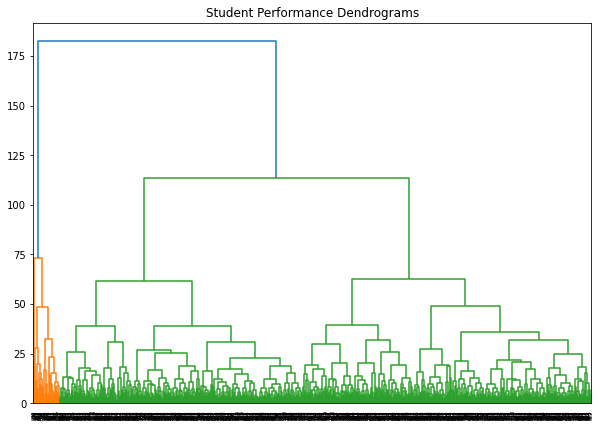

In [26]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Student Performance Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

The dendogram shows three main clusters. However, in order to achieve my second goal in this project, I will use KNN to discover what type of students there are. 

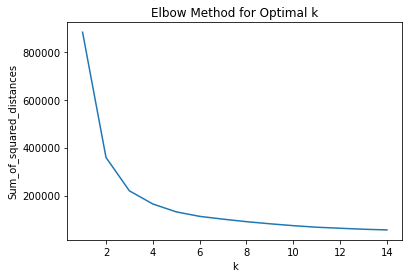

In [27]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [28]:
kmeans=KMeans(n_clusters=4, random_state=0) 
kmeans.fit(df)
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,3
1,0
2,0
3,1
4,3
...,...
995,0
996,2
997,2
998,3


In [29]:
df['Labels'] = labels
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grade,Labels
0,1,1,4,1,0,72,72,74,72.666667,2,3
1,1,2,2,1,1,69,90,88,82.333333,3,0
2,1,1,5,1,0,90,95,93,92.666667,3,0
3,0,0,3,0,0,47,57,44,49.333333,0,1
4,0,2,2,1,0,76,78,75,76.333333,2,3


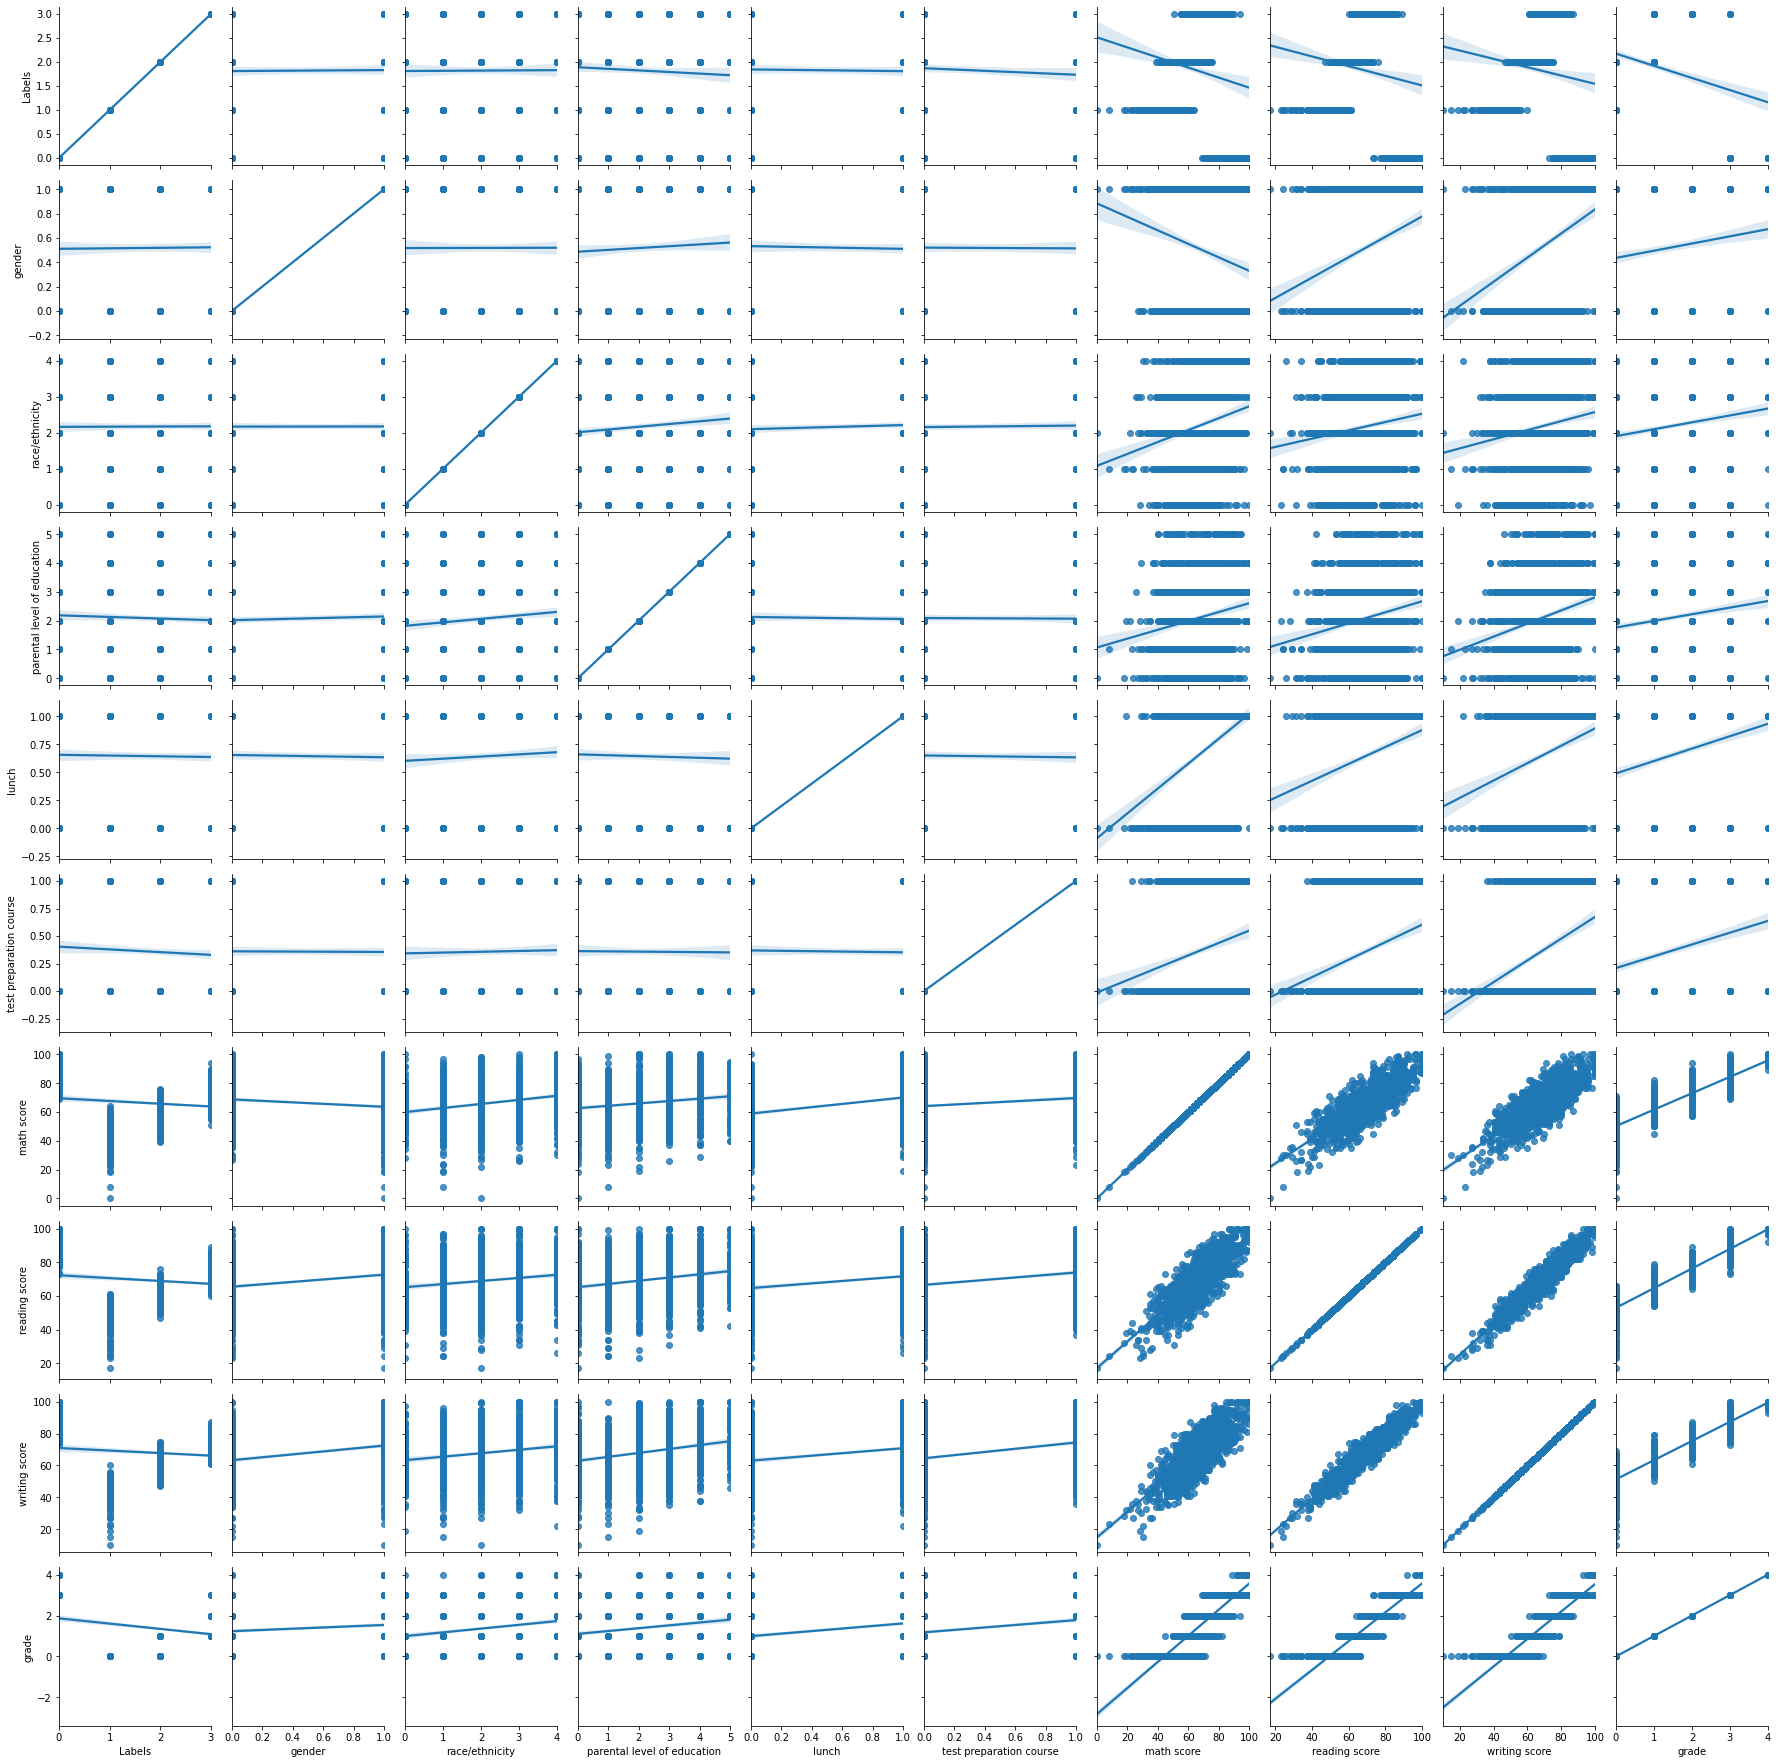

In [33]:
g = sns.PairGrid(df[['Labels', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'grade']])
g.map(sns.regplot)

<AxesSubplot:xlabel='Labels', ylabel='grade'>

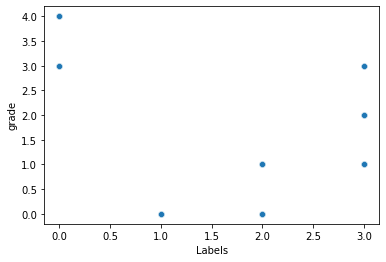

In [38]:
sns.scatterplot(data=df, x="Labels", y="grade")


Concluding Statement:
- In cluster 0, students score B or A. We will call these 'Top Peforming Students'
- In cluster 1, students score F. We will call these 'Very Poor Performing Students'
- In cluster 2, students score F or D. We will call these 'Poor Performing Students'
- In cluster 3, students score D, C, or B. We will call these 'Average Students'


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


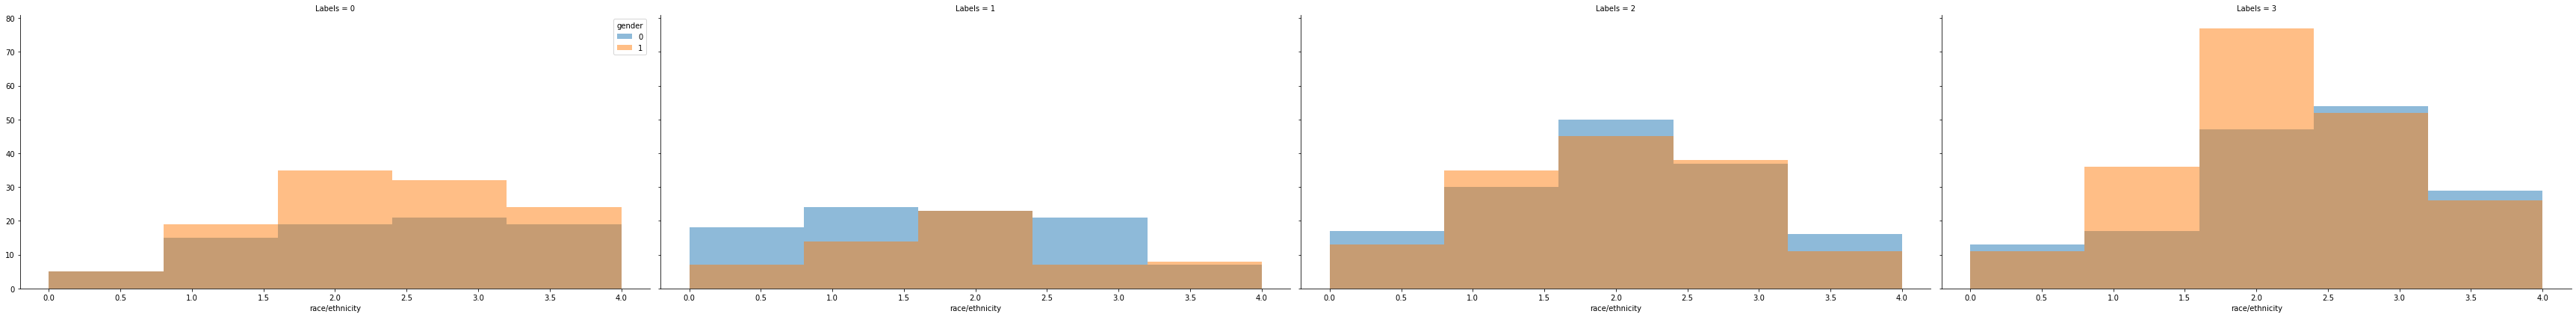

In [52]:
grid = sns.FacetGrid(df, col='Labels', hue='gender', size=6, aspect=2, legend_out=False)
grid.map(plt.hist, 'race/ethnicity', alpha=.5, bins=5)
grid.add_legend();

Here we can see the Top Performing Students were from ethnicity group C whereas the Very Poor Performing Students were from group E. 

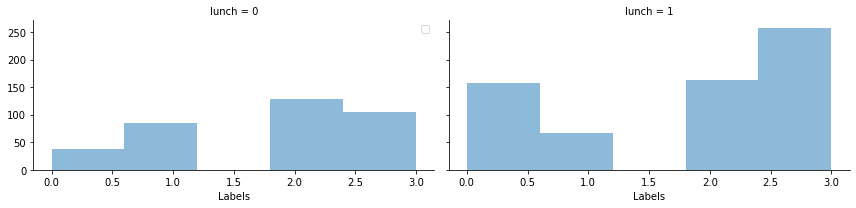

In [60]:
grid = sns.FacetGrid(df, col='lunch', aspect=2, legend_out=False)
grid.map(plt.hist, 'Labels', alpha=.5, bins=5)
grid.add_legend();

Overall, students who had a standard lunch performed better. The Top Performing Students were those who had a standard lunch performed better than the Top Performing Students who had a free/reduced meal. 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


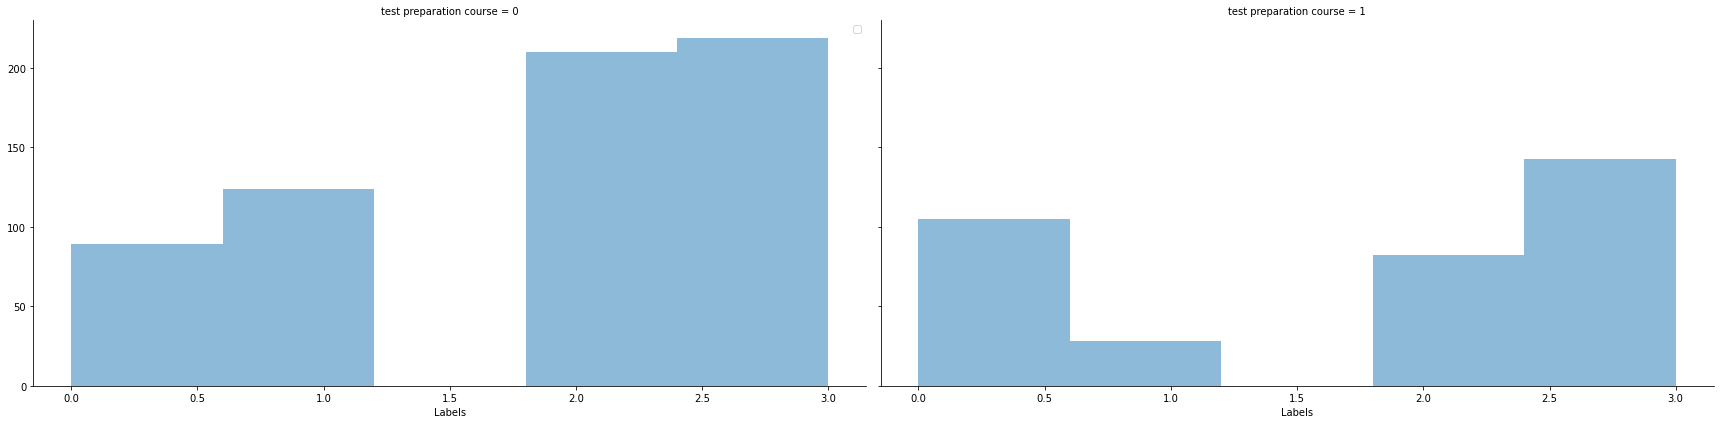

In [54]:
grid = sns.FacetGrid(df, col='test preparation course', size=6, aspect=2, legend_out=False)
grid.map(plt.hist, 'Labels', alpha=.5, bins=5)
grid.add_legend();

The Top Performing Students completed the test preparation course whereas the Very Poor Performing Students did not. 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


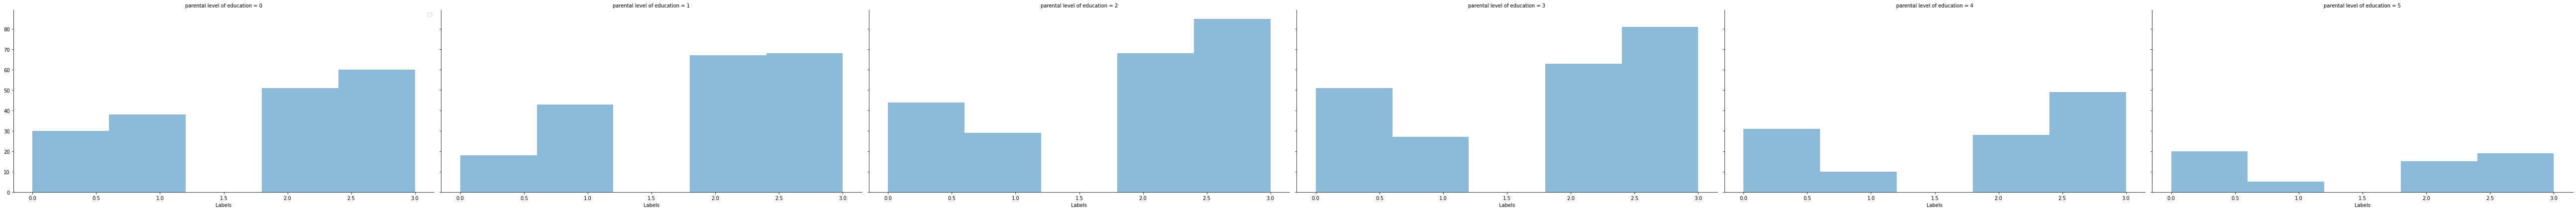

In [55]:
grid = sns.FacetGrid(df, col='parental level of education', size=6, aspect=2, legend_out=False)
grid.map(plt.hist, 'Labels', alpha=.5, bins=5)
grid.add_legend();

The percentage of Poor and Average PErforming Students came mainly from a family with a 'some college' and 'Associate's' degree. On the other hand, the Top Performing Students are with a parental level of Bachelor's education.  

Conclusion: students' performance can be predicted using clustering (hierarchical and partitional). There are four types of students, 'Top Peforming Students','Very Poor Performing Students','Poor Performing Students' and 'Average Students'. The Top Performing Students have a standard lunch, completed the test preparation course, came from a parental level of Bachelor's education and were from the Group ethnicity C. 
